In [1]:
import texas_hold_em.game as game
import texas_hold_em.player as player
import texas_hold_em.card as card


In [13]:
game1 = game.Game(2)
game1.players = [player.SimplePlayer(0), player.SimplePlayer(1)]
game1.deal()
game1.get_bets()
game1.flop()
game1.get_bets()
game1.turn()
game1.get_bets()
game1.river()
game1.get_bets()
winners = game1.determine_round_winners()

In [4]:
# player_1_card_1
# player_1_card_2
# player_2_card_1
# player_2_card_2
# flop_1
# flop_2
# flop_3
# turn
# river
# player_1_hand
# player_2_hand
# winner
import pandas as pd

df = pd.DataFrame(data={
  "player_1_card_1": [game1.players[0].hand_of_two.cards[0].__str__()], 
    "player_1_card_2": [game1.players[0].hand_of_two.cards[1].__str__()],
    "player_2_card_1": [game1.players[1].hand_of_two.cards[0].__str__()],
    "player_2_card_2": [game1.players[1].hand_of_two.cards[1].__str__()],
    "flop_1": [game1.community_cards[0].__str__()],
    "flop_2": [game1.community_cards[1].__str__()],
    "flop_3": [game1.community_cards[2].__str__()],
    "turn": [game1.community_cards[3].__str__()],
    "river": [game1.community_cards[4].__str__()],
    "winner": ["player_{n}".format(n=winners[0].position + 1) if len(winners) == 1 else "split"]
})

NameError: name 'game1' is not defined

In [16]:
df.shape

(314707, 10)

In [15]:
for i in range(999999):
    game1 = game.Game(2)
    game1.players = [player.SimplePlayer(0), player.SimplePlayer(1)]
    game1.deal()
    game1.get_bets()
    game1.flop()
    game1.get_bets()
    game1.turn()
    game1.get_bets()
    game1.river()
    game1.get_bets()
    winners = game1.determine_round_winners()
    df = pd.concat([df, pd.DataFrame(data={
        "player_1_card_1": [game1.players[0].hand_of_two.cards[0].__str__()], 
        "player_1_card_2": [game1.players[0].hand_of_two.cards[1].__str__()],
        "player_2_card_1": [game1.players[1].hand_of_two.cards[0].__str__()],
        "player_2_card_2": [game1.players[1].hand_of_two.cards[1].__str__()],
        "flop_1": [game1.community_cards[0].__str__()],
        "flop_2": [game1.community_cards[1].__str__()],
        "flop_3": [game1.community_cards[2].__str__()],
        "turn": [game1.community_cards[3].__str__()],
        "river": [game1.community_cards[4].__str__()],
        "winner": ["player_{n}".format(n=winners[0].position + 1) if len(winners) == 1 else "split"]
    })])

KeyboardInterrupt: 

In [ ]:
df.to_csv("1m_random_2player_games.csv", index=False)

In [2]:
import pandas as pd
df = pd.read_csv("data/1m_random_2player_games.csv")

In [3]:
from texas_hold_em.deck import Deck

deck = Deck()

p1_counts = df.value_counts(['player_1_card_1', 'player_1_card_2']).reset_index().rename(columns={0: 'count'}).sort_values('count', ascending=False)
p2_counts = df.value_counts(['player_2_card_1', 'player_2_card_2']).reset_index().rename(columns={0: 'count'}).sort_values('count', ascending=False)
p1_win_counts = df[df['winner'] == 'player_1'].value_counts(['player_1_card_1', 'player_1_card_2']).reset_index().rename(columns={0: 'count'}).sort_values('count', ascending=False)
p2_win_counts = df[df['winner'] == 'player_2'].value_counts(['player_2_card_1', 'player_2_card_2']).reset_index().rename(columns={0: 'count'}).sort_values('count', ascending=False)


        


In [4]:
p1_win_counts

,player_1_card_1,player_1_card_2,count
0,A of Clubs,A of Hearts,115
1,J of Hearts,J of Clubs,115
2,A of Spades,A of Clubs,112
3,Q of Diamonds,Q of Hearts,110
4,A of Spades,A of Hearts,110
...,...,...,...
2647,3 of Clubs,2 of Hearts,23
2648,3 of Spades,2 of Hearts,23
2649,2 of Clubs,5 of Spades,22
2650,2 of Clubs,3 of Hearts,21


C:\Users\amarl\AppData\Local\Temp\ipykernel_448\4125228718.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p1 = p1_counts[p1_counts['player_1_card_1'] == card_1.__str__()][p1_counts['player_1_card_2'] == card_2.__str__()]['count'].iloc[0]
C:\Users\amarl\AppData\Local\Temp\ipykernel_448\4125228718.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p2 = p2_counts[p2_counts['player_2_card_1'] == card_1.__str__()][p2_counts['player_2_card_2'] == card_2.__str__()]['count'].iloc[0]
C:\Users\amarl\AppData\Local\Temp\ipykernel_448\4125228718.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p1 = p1_counts[p1_counts['player_1_card_1'] == card.__str__()][p1_counts['player_1_card_2'] == card2.__str__()]['count'].iloc[0]
C:\Users\amarl\AppData\Local\Temp\ipykernel_448\4125228718.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p2 = p2_counts[p2_counts['player_

<Axes: >

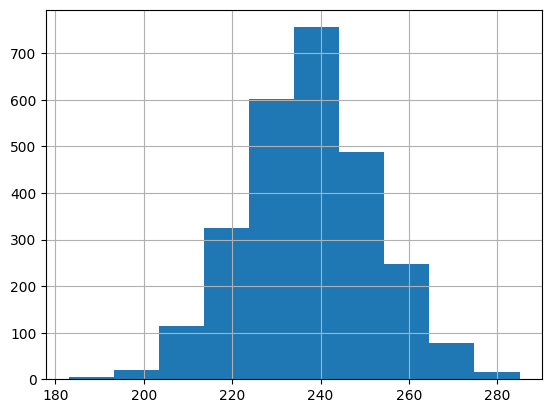

In [5]:
card_1 = deck.cards[0]
card_2 = deck.cards[1]
p1 = p1_counts[p1_counts['player_1_card_1'] == card_1.__str__()][p1_counts['player_1_card_2'] == card_2.__str__()]['count'].iloc[0]
p2 = p2_counts[p2_counts['player_2_card_1'] == card_1.__str__()][p2_counts['player_2_card_2'] == card_2.__str__()]['count'].iloc[0]

total_counts = pd.DataFrame(columns=['card_1', 'card_2', 'count', 'wins'])
for card in deck.cards:
    for card2 in deck.cards:
        if card == card2:
            continue
        p1 = p1_counts[p1_counts['player_1_card_1'] == card.__str__()][p1_counts['player_1_card_2'] == card2.__str__()]['count'].iloc[0]
        p2 = p2_counts[p2_counts['player_2_card_1'] == card.__str__()][p2_counts['player_2_card_2'] == card2.__str__()]['count'].iloc[0]
        p1_win = p1_win_counts[p1_win_counts['player_1_card_1'] == card.__str__()][p1_win_counts['player_1_card_2'] == card2.__str__()]['count'].iloc[0]
        p2_win = p2_win_counts[p2_win_counts['player_2_card_1'] == card.__str__()][p2_win_counts['player_2_card_2'] == card2.__str__()]['count'].iloc[0]
        total_counts = pd.concat([total_counts, pd.DataFrame(data={'card_1': [card.__str__()], 'card_2': [card2.__str__()], 'count': [p1 + p2], 'wins': [p1_win + p2_win]})])
        
total_counts['count'].hist()
    

<Axes: >

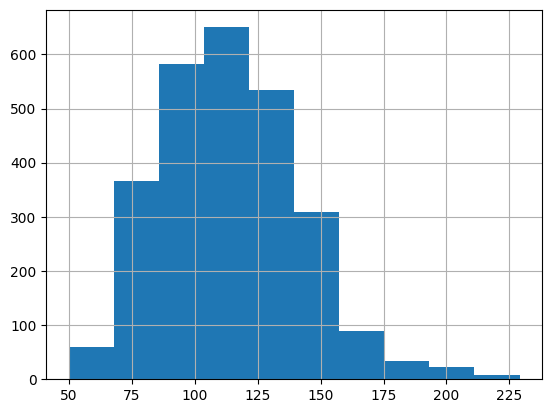

In [8]:
total_counts['wins'].hist()

In [9]:
total_counts['win_rate'] = total_counts['wins'] / total_counts['count']

<Axes: >

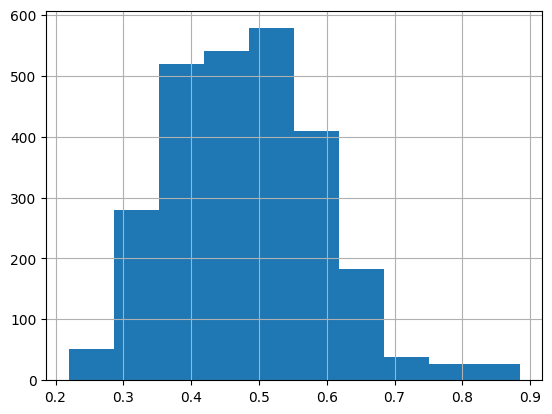

In [10]:
total_counts['win_rate'].hist()

In [11]:
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())
import os
import sqlalchemy

conn = sqlalchemy.create_engine(os.getenv("SUPABASE_CONN_STRING")).connect()

In [12]:
total_counts = total_counts.sort_values('win_rate', ascending=False)
total_counts['rank'] = range(1, total_counts.shape[0] + 1)
total_counts['percentile'] = ((total_counts.shape[0] - total_counts['rank']) / total_counts.shape[0]) * 100.0
total_counts

,card_1,card_2,count,wins,win_rate,rank,percentile
0,A of Clubs,A of Hearts,251,222,0.884462,1,99.962293
0,A of Spades,A of Clubs,244,213,0.872951,2,99.924585
0,A of Clubs,A of Diamonds,241,210,0.871369,3,99.886878
0,A of Hearts,A of Spades,235,202,0.859574,4,99.849170
0,A of Hearts,A of Diamonds,241,207,0.858921,5,99.811463
...,...,...,...,...,...,...,...
0,2 of Diamonds,3 of Clubs,246,58,0.235772,2648,0.150830
0,3 of Hearts,2 of Diamonds,222,52,0.234234,2649,0.113122
0,3 of Spades,2 of Hearts,223,50,0.224215,2650,0.075415
0,2 of Diamonds,3 of Spades,227,50,0.220264,2651,0.037707


In [13]:
total_counts.to_sql("two_player_game_odds", conn, if_exists='replace', index=False, schema='poker')

652

In [ ]:
conn.commit()
conn.close()